In [1]:
import os
import sys
import re
import random

In [ ]:
'''
TED talkのデータセット
https://www.cs.jhu.edu/~kevinduh/a/multitarget-tedtalks/
'''

### ダウンロードと解凍（強制上書き）
!mkdir -p ted
!wget -O ted/multitarget-ted.tgz https://www.cs.jhu.edu/~kevinduh/a/multitarget-tedtalks/multitarget-ted.tgz
!tar -xzf ted/multitarget-ted.tgz -C ted/

### ファイル読み込み
# 本データセットは\n付いたまま処理する。
with open('ted/multitarget-ted/en-ja/raw/ted_train_en-ja.raw.ja', errors='ignore') as f:
    ted_lines_ja_train = f.readlines()
with open('ted/multitarget-ted/en-ja/raw/ted_train_en-ja.raw.en', errors='ignore') as f:
    ted_lines_en_train = f.readlines()
with open('ted/multitarget-ted/en-ja/raw/ted_test1_en-ja.raw.ja', errors='ignore') as f:
    ted_lines_ja_test = f.readlines()
with open('ted/multitarget-ted/en-ja/raw/ted_test1_en-ja.raw.en', errors='ignore') as f:
    ted_lines_en_test = f.readlines()
with open('ted/multitarget-ted/en-ja/raw/ted_dev_en-ja.raw.ja', errors='ignore') as f:
    ted_lines_ja_dev = f.readlines()
with open('ted/multitarget-ted/en-ja/raw/ted_dev_en-ja.raw.en', errors='ignore') as f:
    ted_lines_en_dev = f.readlines()

### リスト連結
ted_lines_ja = ted_lines_ja_train + ted_lines_ja_test + ted_lines_ja_dev
ted_lines_en = ted_lines_en_train + ted_lines_en_test + ted_lines_en_dev

len(ted_lines_ja)

# サンプルを確認
for i in random.sample(list(range(len(ted_lines_ja))), 5):
  print(ted_lines_ja[i])
  print(ted_lines_en[i])

### 句読点の挿入

'''
日本語が以下のような感じで、句読点がなく半角スペース区切りになっている。

私たちのミッションの多くは 写真やビデオを撮影するものです 撮影が始まってしまえば たいていは コーヒーを取りに行き しばらくは のんびりと待つのです のんびりとできないで 無人機が戻らなかったらどうしようと パニックになる人もいますけどね\n

文中でも句点を入れたほうがよさそうだが、難しいので、
①文中で「ね 」「です 」「ます 」等は句点を入れる。
②文中でそれ以外は読点を入れる。
③文末は句点を入れる。
これでだいぶきれいになる。
'''

ted_lines_ja = [l.replace("です ", "です。") for l in ted_lines_ja]
ted_lines_ja = [l.replace("ます ", "ます。") for l in ted_lines_ja]
ted_lines_ja = [l.replace("でした ", "でした。") for l in ted_lines_ja]
ted_lines_ja = [l.replace("ました ", "ました。") for l in ted_lines_ja]
ted_lines_ja = [l.replace("ません ", "ません。") for l in ted_lines_ja]
ted_lines_ja = [l.replace("でしょう ", "でしょう。") for l in ted_lines_ja]
ted_lines_ja = [l.replace("でしょうか ", "でしょうか。") for l in ted_lines_ja]
ted_lines_ja = [l.replace("ますか ", "ますか。") for l in ted_lines_ja]
ted_lines_ja = [l.replace("ませんか ", "ませんか。") for l in ted_lines_ja]
ted_lines_ja = [l.replace("ね ", "ね。") for l in ted_lines_ja]
ted_lines_ja = [l.replace(" ", "、") for l in ted_lines_ja]
ted_lines_ja = [l.replace("\n", "。\n") for l in ted_lines_ja]

print(len(ted_lines_ja))
print(len(ted_lines_en))

# 長さ確認（異常なサンプルがないか）
print(max([len(l) for l in ted_lines_ja]))
print(min([len(l) for l in ted_lines_ja]))
print(max([len(l) for l in ted_lines_en]))
print(min([len(l) for l in ted_lines_en]))

# 対訳の確認（念のため）
for i in random.sample(list(range(len(ted_lines_ja))), 10):
  print(ted_lines_ja[i])
  print(ted_lines_en[i])

### 保存
with open("ted/ted_clean_ja.txt", "w") as file:
    for l in ted_lines_ja:
        _ = file.write(l)
with open("ted/ted_clean_en.txt", "w") as file:
    for l in ted_lines_en:
        _ = file.write(l)

In [ ]:
'''
青空文庫等の学習データ（NICT）の取得とクリーニング
https://www2.nict.go.jp/astrec-att/member/mutiyama/align/index.html
Project Gutenberg や青空文庫やプロジェクト杉田玄白などの作品について，日本語文と英語文との対訳文対応を付けたもの。
'''

### ダウンロードと解凍
!mkdir -p aozora
!wget -O aozora/para.zip https://www2.nict.go.jp/astrec-att/member/mutiyama/align/download/para.zip
!unzip -o aozora/para.zip -d aozora/

### まず日本語のほうの文字コードをutf-8にして保存
# 一部なぜか読めない文字列があるみたいなのでignore（スキップ）
with open('aozora/para/ja.txt', 'r',encoding='shift_jis', errors='ignore') as f:
    text_jp = f.read()
with open('aozora/para/ja_utf8.txt', 'w', encoding="utf-8") as f:
    f.write(text_jp)

### 1行ずつのリスト形式で読み込み
with open('aozora/para/ja_utf8.txt', errors='ignore') as f:
    aozora_lines_ja = f.readlines()
with open('aozora/para/en.txt', errors='ignore') as f:
    aozora_lines_en = f.readlines()

len(aozora_lines_ja)

# サンプルを確認
for i in random.sample(list(range(len(aozora_lines_ja))), 5):
  print(aozora_lines_ja[i])
  print(aozora_lines_en[i])

### 基本的なクリーニング

# 日本語はChasenで分かち書きされてるのでくっつける。
aozora_lines_ja = [l.replace(' ','').strip() for l in aozora_lines_ja]

# 英語は末尾の\nだけ削る
aozora_lines_en = [l.strip() for l in aozora_lines_en]

# 英語と日本語のどちらもアイテムがあるものだけ抽出する
valid_ix = [i for i in range(len(aozora_lines_ja)) if (len(aozora_lines_ja[i]) > 0 and len(aozora_lines_en[i]) > 0)]
aozora_lines_ja = [aozora_lines_ja[i] for i in valid_ix]
aozora_lines_en = [aozora_lines_en[i] for i in valid_ix]

### 分断された文の結合
'''
1文が2行に分けてある部分もあり、それは行頭が大文字かどうかで判断できるので、
英語で行頭が大文字じゃない（カッコとかも含む）ところはくっつける
ただし作品名とかが
################/tempest.alml/################みたいに
入ってる部分は除く
'''
for i in range(len(aozora_lines_en)):
  if (aozora_lines_en[i][0].isupper() == False) and (aozora_lines_en[i][0] != '#'):
    aozora_lines_en[i] = aozora_lines_en[i-1] + ' ' + aozora_lines_en[i]
    aozora_lines_en[i-1] = ''
    aozora_lines_ja[i] = aozora_lines_ja[i-1] + aozora_lines_ja[i]
    aozora_lines_ja[i-1] = ''

# 結合されたセンテンスがおかしくないか確認
merged_en = [aozora_lines_en[i] for i in range(len(aozora_lines_en)) if len(aozora_lines_en[i])>0 and len(aozora_lines_en[i-1])==0]
merged_ja = [aozora_lines_ja[i] for i in range(len(aozora_lines_ja)) if len(aozora_lines_ja[i])>0 and len(aozora_lines_ja[i-1])==0]
for i in random.sample(list(range(len(merged_en))), 3):
  print(merged_en[i])
  print(merged_ja[i])

# 空の要素を削除
valid_ix = [i for i in range(len(aozora_lines_ja)) if (len(aozora_lines_ja[i]) > 0 and len(aozora_lines_en[i]) > 0)]
aozora_lines_ja = [aozora_lines_ja[i] for i in valid_ix]
aozora_lines_en = [aozora_lines_en[i] for i in valid_ix]

print(len(aozora_lines_ja))
print(len(aozora_lines_en))

### URLが入ってるところはだいたいおかしいので削る
target_ix = [i for i in range(len(aozora_lines_ja)) if ('http://' in aozora_lines_ja[i]) or ('https://' in aozora_lines_ja[i])]

# 降順にソートしてからpopで削除
ix_sorted = sorted(target_ix, reverse=True)
for ix in ix_sorted:
    aozora_lines_ja.pop(ix)
    aozora_lines_en.pop(ix)

### 英字まじりの文をまとめて削除

'''
いろいろ見直した結果、日本文に英字が10文字以上連続で入ってるやつは
全部削除したほうがよさそうなので消す。
この操作、
################/tortoise.alml/################
みたいな作品タイトル行も除去できる。
'''

target_ix = [i for i in range(len(aozora_lines_ja)) if bool(re.search(r'[a-zA-Z,\.!?\"\':; ]{10,}', aozora_lines_ja[i]))]
ix_sorted = sorted(target_ix, reverse=True)
for ix in ix_sorted:
    aozora_lines_ja.pop(ix)
    aozora_lines_en.pop(ix)

### 適当に文を連結

'''
元が小説のデータなので、文脈上連続している文が多く、その連続を踏まえないと、
「he」を具体的な名前で和訳している箇所の意味が分からなかったりする。
そこで、適当だが、2文ずつ連結することで、全体的にやや長い対訳サンプルにする。
ただしそれをやるとサンプルが半分になって3万件程度になる。
そこで、連結するペアをずらすことで2パターン作成し、さらに連結前の文も残すことで、
一種のdata augmantationを行う（全く同じ文はないことになるのでOK。）
このコーパスは質が高いので、多めに取っておきたいというのもある。
'''

aozora_lines_en_Concat1 = [aozora_lines_en[i] + ' ' + aozora_lines_en[i + 1] for i in range(0, len(aozora_lines_en) - 1, 2)]
aozora_lines_en_Concat2 = [aozora_lines_en[i] + ' ' + aozora_lines_en[i + 1] for i in range(1, len(aozora_lines_en) - 1, 2)]
aozora_lines_ja_Concat1 = [aozora_lines_ja[i] + aozora_lines_ja[i + 1] for i in range(0, len(aozora_lines_ja) - 1, 2)]
aozora_lines_ja_Concat2 = [aozora_lines_ja[i] + aozora_lines_ja[i + 1] for i in range(1, len(aozora_lines_ja) - 1, 2)]

aozora_lines_en = aozora_lines_en + aozora_lines_en_Concat1 + aozora_lines_en_Concat2
aozora_lines_ja = aozora_lines_ja + aozora_lines_ja_Concat1 + aozora_lines_ja_Concat2

# 対訳の確認（念のため）
for i in random.sample(list(range(len(aozora_lines_ja))), 10):
  print(aozora_lines_ja[i])
  print(aozora_lines_en[i])

print(len(aozora_lines_ja))
print(len(aozora_lines_en))

# クリーニング済みのテキストを保存
with open("aozora/aozora_clean_ja.txt", "w") as file:
    for l in aozora_lines_ja:
        _ = file.write(l+'\n')
with open("aozora/aozora_clean_en.txt", "w") as file:
    for l in aozora_lines_en:
        _ = file.write(l+'\n')

In [ ]:
"""
京都フリー翻訳タスク
http://www.phontron.com/kftt/index-ja.html
"""

### ダウンロードと解凍（強制上書き）
!mkdir -p kyoto
!wget -O kyoto/kftt-data-1.0.tar.gz http://www.phontron.com/kftt/download/kftt-data-1.0.tar.gz
!tar -xzf kyoto/kftt-data-1.0.tar.gz -C kyoto/

### ファイル読み込み
# 本データセットは\n付いたまま処理する。
with open('kyoto/kftt-data-1.0/data/orig/kyoto-train.ja', errors='ignore') as f:
    kyoto_lines_ja_train = f.readlines()
with open('kyoto/kftt-data-1.0/data/orig/kyoto-train.en', errors='ignore') as f:
    kyoto_lines_en_train = f.readlines()
with open('kyoto/kftt-data-1.0/data/orig/kyoto-dev.ja', errors='ignore') as f:
    kyoto_lines_ja_dev = f.readlines()
with open('kyoto/kftt-data-1.0/data/orig/kyoto-dev.en', errors='ignore') as f:
    kyoto_lines_en_dev = f.readlines()
with open('kyoto/kftt-data-1.0/data/orig/kyoto-test.ja', errors='ignore') as f:
    kyoto_lines_ja_test = f.readlines()
with open('kyoto/kftt-data-1.0/data/orig/kyoto-test.en', errors='ignore') as f:
    kyoto_lines_en_test = f.readlines()
with open('kyoto/kftt-data-1.0/data/orig/kyoto-tune.ja', errors='ignore') as f:
    kyoto_lines_ja_tune = f.readlines()
with open('kyoto/kftt-data-1.0/data/orig/kyoto-tune.en', errors='ignore') as f:
    kyoto_lines_en_tune = f.readlines()

### リスト連結
kyoto_lines_ja = kyoto_lines_ja_train + kyoto_lines_ja_dev + kyoto_lines_ja_test + kyoto_lines_ja_tune
kyoto_lines_en = kyoto_lines_en_train + kyoto_lines_en_dev + kyoto_lines_en_test + kyoto_lines_en_tune

len(kyoto_lines_ja)

# サンプルを確認
for i in random.sample(list(range(len(kyoto_lines_ja))), 5):
  print(kyoto_lines_ja[i])
  print(kyoto_lines_en[i])

### 日本語で35文字以上200文字未満を取る。
target_ix = [i for i in range(len(kyoto_lines_ja)) if (len(kyoto_lines_ja[i]) >= 35) and (len(kyoto_lines_ja[i]) <= 200)]
kyoto_lines_ja = [kyoto_lines_ja[i] for i in target_ix]
kyoto_lines_en = [kyoto_lines_en[i] for i in target_ix]

# 対訳の確認（念のため）
for i in random.sample(list(range(len(kyoto_lines_ja))), 5):
  print(kyoto_lines_ja[i])
  print(kyoto_lines_en[i])

print(len(kyoto_lines_ja))
print(len(kyoto_lines_en))

### 保存
# クリーニング済みのテキストを保存
with open("kyoto/kyoto_clean_ja.txt", "w") as file:
    for l in kyoto_lines_ja:
        _ = file.write(l)
with open("kyoto/kyoto_clean_en.txt", "w") as file:
    for l in kyoto_lines_en:
        _ = file.write(l)

In [ ]:
"""
映画の字幕
https://nlp.stanford.edu/projects/jesc/index.html
"""

### ダウンロードと解凍（強制上書き）
!mkdir -p subtitle
!wget -O subtitle/raw.tar.gz https://nlp.stanford.edu/projects/jesc/data/raw.tar.gz
!tar -xzf subtitle/raw.tar.gz -C subtitle/

### 読み込み
with open('subtitle/raw/raw') as f:
    subtitle_lines = f.readlines()

### 日本語と英語に分ける
subtitle_lines_en = [l.strip().split('\t')[0] for l in subtitle_lines]
subtitle_lines_ja = [l.strip().split('\t')[1] for l in subtitle_lines]

len(subtitle_lines_ja)

# サンプルを確認
for i in random.sample(list(range(len(subtitle_lines_ja))), 5):
  print(subtitle_lines_ja[i])
  print(subtitle_lines_en[i])

### 読点を入れる
subtitle_lines_ja = [l.replace(" ", "、") for l in subtitle_lines_ja]

# 対訳の確認（念のため）
for i in random.sample(list(range(len(subtitle_lines_ja))), 5):
  print(subtitle_lines_ja[i])
  print(subtitle_lines_en[i])

### 日本語で25文字以上のものに限定する
target_ix = [i for i in range(len(subtitle_lines_ja)) if (len(subtitle_lines_ja[i]) >= 25)]
subtitle_lines_ja = [subtitle_lines_ja[i] for i in target_ix]
subtitle_lines_en = [subtitle_lines_en[i] for i in target_ix]

print(len(subtitle_lines_ja))
print(len(subtitle_lines_en))

### 保存
# クリーニング済みのテキストを保存
with open("subtitle/subtitle_clean_ja.txt", "w") as file:
    for l in subtitle_lines_ja:
        _ = file.write(l+'\n')
with open("subtitle/subtitle_clean_en.txt", "w") as file:
    for l in subtitle_lines_en:
        _ = file.write(l+'\n')

In [ ]:
"""
田中コーパス
http://www.edrdg.org/wiki/index.php/Tanaka_Corpus
"""

### ダウンロードと解凍（強制上書き）
!mkdir -p tanaka
!wget -O tanaka/examples.utf.gz ftp://ftp.edrdg.org/pub/Nihongo/examples.utf.gz
!gunzip -f tanaka/examples.utf.gz

### 読み込み
with open('tanaka/examples.utf') as f:
    tanaka_lines = f.readlines()

# B: で始まる行を削除
tanaka_lines = [l for l in tanaka_lines if l.startswith('A: ')]

# 先頭の'A: 'の部分を削除
tanaka_lines = [l.replace('A: ', '', 1) for l in tanaka_lines]

# '#ID' 以降の部分を削除
tanaka_lines = [l.split('#ID')[0].strip() for l in tanaka_lines]

### 日本語と英語に分ける
tanaka_ja = [l.split('\t')[0] for l in tanaka_lines]
tanaka_en = [l.split('\t')[1] for l in tanaka_lines]

len(tanaka_ja)

# 対訳の確認（念のため）
for i in random.sample(list(range(len(tanaka_ja))), 5):
  print(tanaka_ja[i])
  print(tanaka_en[i])

### 保存
# クリーニング済みのテキストを保存
with open("tanaka/tanaka_clean_ja.txt", "w") as file:
    for l in tanaka_ja:
        _ = file.write(l+'\n')
with open("tanaka/tanaka_clean_en.txt", "w") as file:
    for l in tanaka_en:
        _ = file.write(l+'\n')

In [ ]:
"""
日英法令対訳
http://www.phontron.com/jaen-law/index-ja.html
"""

### ダウンロードと解凍（強制上書き）
!mkdir -p law
!wget -O law/jaen-law.tar.gz http://www.phontron.com/jaen-law/jaen-law.tar.gz
!tar -xzf law/jaen-law.tar.gz -C law/

# ファイル読み込み
with open('law/jaen-law/txt/law-corpus.en') as f:
    law_en_lines = f.readlines()
with open('law/jaen-law/txt/law-corpus.ja') as f:
    law_ja_lines = f.readlines()

print(len(law_en_lines))
print(len(law_ja_lines))

### 日本語で20文字以上の行に限定する
target_ix = [i for i in range(len(law_ja_lines)) if (len(law_ja_lines[i]) >= 20)]
law_ja_lines = [law_ja_lines[i] for i in target_ix]
law_en_lines = [law_en_lines[i] for i in target_ix]

print(len(law_en_lines))
print(len(law_ja_lines))

# 対訳の確認（念のため）
for i in random.sample(list(range(len(law_en_lines))), 5):
  print(law_en_lines[i])
  print(law_ja_lines[i])

### 保存
# クリーニング済みのテキストを保存
with open("law/law_clean_ja.txt", "w") as file:
    for l in law_ja_lines:
        _ = file.write(l)
with open("law/law_clean_en.txt", "w") as file:
    for l in law_en_lines:
        _ = file.write(l)

In [ ]:
"""
JParaCrawl（NTT）の取得とクリーニング
http://www.kecl.ntt.co.jp/icl/lirg/jparacrawl/
"""

### ダウンロードと解凍（強制上書き）
#!mkdir -p jparacrawl
#!wget -O jparacrawl/en-ja.tar.gz http://www.kecl.ntt.co.jp/icl/lirg/jparacrawl/release/3.0/bitext/en-ja.tar.gz
!tar -xzf jparacrawl/en-ja.tar.gz -C jparacrawl/

# 全行を読み込みする場合（読み込み自体は数十秒ぐらいでできる）
with open('jparacrawl/en-ja/en-ja.bicleaner05.txt') as f:
    crawl_lines = f.readlines()

# サンプルを確認
for l in random.sample(crawl_lines, 5):
  print(l.strip().split('\t')[-1])
  print(l.strip().split('\t')[-2])

'''
# 数値のところの分布を確認すると以下のようになったが、
# 0.79以上みたいなスコアが高いものに限定してしまうと、
# ゆんフリー写真素材集 : No. 9877 草津温泉 湯畑 [日本 / 群馬]
# みたいなのばっかりになるのでよくないっぽい。
# サンプル総数：25,740,835
# 0.4以上0.5未満：0.0
# 0.5以上0.6未満：0.1152207377888091
# 0.6以上0.7未満：0.16798157480128365
# 0.7以上0.8未満：0.7167976874099072
# 0.75以上0.8未満：0.3224694925397719
# 0.75以上0.775未満：0.2583718049550452（8,300,634件）
# 0.76以上：0.20323936655512534（5,231,551件）
# 0.77以上：0.09364913764452475（2,410,607件）
# 0.775以上：0.06409768758472675（1,649,928件）
# 0.78以上：0.031290127146225054（805,434件）
# 0.785以上：0.009059340926586104（233,195件）
# 0.79以上：0.0011227297016588624（28,900件）
# 0.8以上：0.0

scores = [float(l.strip().split('\t')[2]) for l in crawl_lines]
'''

'''
# どのスコア帯のサンプルが比較的健全であるかを目視確認

min_score = 0.75
max_score = 0.80
ranged_lines = [l for l in crawl_lines if float(l.strip().split('\t')[2]) >= min_score and float(l.strip().split('\t')[2]) <= max_score]
for l in random.sample(ranged_lines, 5):
  print(l.strip().split('\t')[-1])
  print(l.strip().split('\t')[-2])
  print('\n')
'''

'''
スコア0.6から0.8まで、0.05刻みで階級をつくり、各階級から30の対訳ペアをランダムに
抽出して、ChtGPTに「適切な訳かどうか」をgood/badで評価させたところ、以下のとおり。

0.50-0.55　14 GOODs
0.55-0.60　18 GOODs
0.60-0.65　18 GOODs
0.65-0.70　21 GOODs
0.70-0.75　21 GOODs
0.75-0.80　26 GOODs

本当はもっと精査したほうがいいと思うが、まず0.65以上に絞った上で、
・日本語文が短いものと長いものを削除
・日本語文の中に3文字以上の連続する英字が混じっているものを削除
・日本語文が句点でおわっていないものを削除
・英文が大文字で始まっていないものを削除
・日本語文と英語文の長さの比が極端なものを削除
することにする。
'''

### クリーニング用に範囲内のサンプルを抽出
min_score = 0.70
max_score = 0.80
crawl_lines = [l for l in crawl_lines if float(l.strip().split('\t')[2]) >= min_score and float(l.strip().split('\t')[2]) <= max_score]

### 日本語と英語に分ける
crawl_ja = [l.strip().split('\t')[-1] for l in crawl_lines]  # 一番うしろが日本語
crawl_en = [l.strip().split('\t')[-2] for l in crawl_lines]  # うしろから2番目が英語

'''
ヒストグラムで日本語文と英語文の長さの比の分布を確認
length_ratio = [(len(crawl_en[i]) / len(crawl_ja[i])) for i in range(len(crawl_en))]
import matplotlib.pyplot as plt
import numpy as np
bins = np.arange(0, 4.2, 0.2).tolist()

plt.hist(length_ratio, bins=bins, rwidth=0.8)
plt.show()
'''

### 長さの比が極端でないものだけ残す
target_ix = [i for i in range(len(crawl_en)) if (len(crawl_en[i]) / len(crawl_ja[i])) > 1.8 and (len(crawl_en[i]) / len(crawl_ja[i]))  < 2.6]

crawl_en = [crawl_en[i] for i in target_ix]
crawl_ja = [crawl_ja[i] for i in target_ix]

print(len(crawl_en))
print(len(crawl_ja))

### 日本文が長いものと短いものを削除
medium_length_ix = [i for i in range(len(crawl_ja)) if (len(crawl_ja[i]) > 30) and (len(crawl_ja[i]) < 300)]
crawl_ja = [crawl_ja[i] for i in medium_length_ix]
crawl_en = [crawl_en[i] for i in medium_length_ix]

print(len(crawl_en))
print(len(crawl_ja))

### 日本文が句点で終わるものだけ抽出
target_ix = [i for i in range(len(crawl_ja)) if crawl_ja[i][-1] == '。']

crawl_en = [crawl_en[i] for i in target_ix]
crawl_ja = [crawl_ja[i] for i in target_ix]

### 英文が大文字で始まるものだけ抽出
target_ix = [i for i in range(len(crawl_en)) if crawl_en[i][0].isupper()]

crawl_en = [crawl_en[i] for i in target_ix]
crawl_ja = [crawl_ja[i] for i in target_ix]

### 日本文に英字を含まないものだけ抽出
target_ix = [i for i in range(len(crawl_ja)) if not re.search(r'[a-zA-Z!@#$%^&*()-=_+[\]{};:\'",.<>?/|\\]', crawl_ja[i])]
crawl_en = [crawl_en[i] for i in target_ix]
crawl_ja = [crawl_ja[i] for i in target_ix]

'''
### 日本文に連続する3文字以上の英字部分を含むものを削除
target_ix = [i for i in range(len(crawl_ja)) if bool(re.search(r'[a-zA-Z,\.!?\"\':; ]{3,}', crawl_ja[i]))]
ix_sorted = sorted(target_ix, reverse=True)
for ix in ix_sorted:
    crawl_ja.pop(ix)
    crawl_en.pop(ix)
'''

print(len(crawl_en))
print(len(crawl_ja))

# 対訳の確認（念のため）
for i in random.sample(list(range(len(crawl_ja))), 20):
  print(crawl_ja[i])
  print(crawl_en[i])

### 保存
# クリーニング済みのテキストを保存
with open("jparacrawl/crawl_clean_ja.txt", "w") as file:
    for l in crawl_ja:
        _ = file.write(l+'\n')
with open("jparacrawl/crawl_clean_en.txt", "w") as file:
    for l in crawl_en:
        _ = file.write(l+'\n')

TED:158535
青空:118825
京都:218038
映画:313927
田中:147865
法令:185607
JPara:3669859
計:4812656
1342797
1342797
５分と走らないうちに息切れしてしまった。

I had not run five minutes when I got out of breath.

そうじゃないわよ。、エコーしたら、胃に、異常がある事が分かったの。

that isn't the case. when i made the echography there was something wrong with the stomach, i think.

４　都道府県知事等は、前項の報告書を受理したときは、厚生労働省令で定めるところにより報告書を作成し、厚生労働大臣にこれを提出しなければならない。

(4) A prefectural governor, etc. shall, when receiving a written report set forth in the preceding paragraph, prepare a further written report and submit it to the Minister of Health, Labour and Welfare, pursuant to an Ordinance of the Ministry of Health, Labour and Welfare.

思ったとおりだ。

Man: I knew it was big. 

そのチャットルームや、似たサイトで、怪しい動きをしている人物に出会ったら、cbiに連絡してください、お願いします

we would ask anybody who uses that chat room or similar sites to please contact the cbi if they come across any suspicious activity online.

第二百五条　受益証券発行信託の受託者は、前条第一項に規定する場合には、併合された受益権に係る受益証券を登録受益権質権者に引き渡さなければならない。

Article 205  (1) In the c

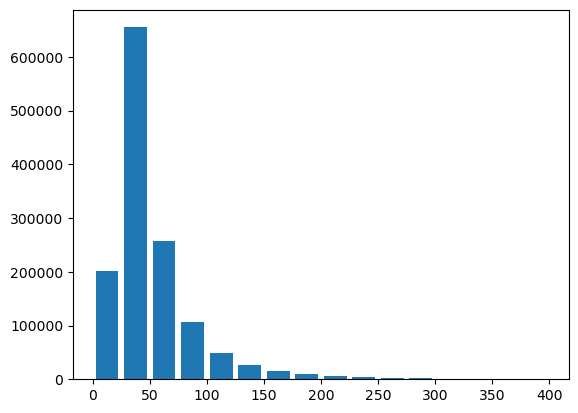

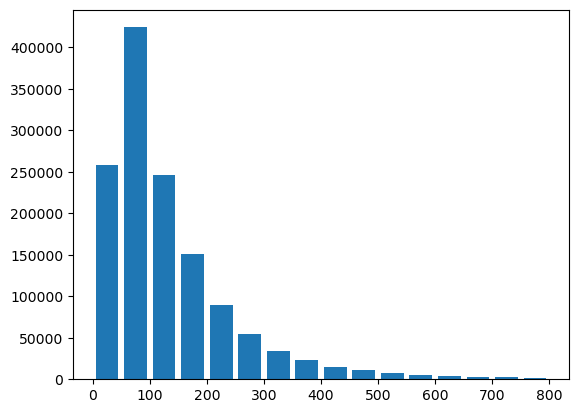

In [3]:
"""
すべてのコーパスの合体
"""

### 全部読み込み

# TED
with open('ted/ted_clean_ja.txt') as f:
    ted_clean_ja = f.readlines()
with open('ted/ted_clean_en.txt') as f:
    ted_clean_en = f.readlines()
print('TED:'+str(len(ted_clean_ja)))

# 青空文庫等
with open('aozora/aozora_clean_ja.txt') as f:
    aozora_clean_ja = f.readlines()
with open('aozora/aozora_clean_en.txt') as f:
    aozora_clean_en = f.readlines()
print('青空:'+str(len(aozora_clean_ja)))

# 京都
with open('kyoto/kyoto_clean_ja.txt') as f:
    kyoto_clean_ja = f.readlines()
with open('kyoto/kyoto_clean_en.txt') as f:
    kyoto_clean_en = f.readlines()
print('京都:'+str(len(kyoto_clean_ja)))

# 映画字幕
with open('subtitle/subtitle_clean_ja.txt') as f:
    subtitle_clean_ja = f.readlines()
with open('subtitle/subtitle_clean_en.txt') as f:
    subtitle_clean_en = f.readlines()
print('映画:'+str(len(subtitle_clean_ja)))

# 田中コーパス
with open('tanaka/tanaka_clean_ja.txt') as f:
    tanaka_clean_ja = f.readlines()
with open('tanaka/tanaka_clean_en.txt') as f:
    tanaka_clean_en = f.readlines()
print('田中:'+str(len(tanaka_clean_ja)))

# 法令
with open('law/law_clean_ja.txt') as f:
    law_clean_ja = f.readlines()
with open('law/law_clean_en.txt') as f:
    law_clean_en = f.readlines()
print('法令:'+str(len(law_clean_en)))

# JParaCrawl
with open('jparacrawl/crawl_clean_ja.txt') as f:
    crawl_clean_ja = f.readlines()
with open('jparacrawl/crawl_clean_en.txt') as f:
    crawl_clean_en = f.readlines()
print('JPara:'+str(len(crawl_clean_ja)))

print('計:' + str(len(ted_clean_ja)+len(aozora_clean_ja)+len(kyoto_clean_ja)+len(subtitle_clean_ja)+len(tanaka_clean_ja)+len(crawl_clean_ja)+len(law_clean_en)))

### 適当な分量に制限

# 京都
target_ix = random.sample(list(range(len(kyoto_clean_ja))), len(kyoto_clean_ja))  # 全部
kyoto_clean_ja = [kyoto_clean_ja[i] for i in target_ix]
kyoto_clean_en = [kyoto_clean_en[i] for i in target_ix]

# 映画
target_ix = random.sample(list(range(len(subtitle_clean_ja))), len(subtitle_clean_ja))  # 結全部
subtitle_clean_ja = [subtitle_clean_ja[i] for i in target_ix]
subtitle_clean_en = [subtitle_clean_en[i] for i in target_ix]

# JParaCrawl
target_ix = random.sample(list(range(len(crawl_clean_ja))), 200000)
crawl_clean_ja = [crawl_clean_ja[i] for i in target_ix]
crawl_clean_en = [crawl_clean_en[i] for i in target_ix]

### コーパスの合体とシャッフル
mixed_ja = ted_clean_ja + aozora_clean_ja + kyoto_clean_ja + subtitle_clean_ja + tanaka_clean_ja + crawl_clean_ja + law_clean_ja
mixed_en = ted_clean_en + aozora_clean_en + kyoto_clean_en + subtitle_clean_en + tanaka_clean_en + crawl_clean_en + law_clean_en

lines_ix = list(range(len(mixed_ja)))
random.shuffle(lines_ix)  # 代入しなくていい

mixed_ja = [mixed_ja[i] for i in lines_ix]
mixed_en = [mixed_en[i] for i in lines_ix]

print(len(mixed_ja))
print(len(mixed_en))

# 空の要素や要素数1の要素があるかどうかのチェック
empty_ix = [i for i in range(len(kyoto_clean_ja)) if len(kyoto_clean_ja[i]) == 1]
len(empty_ix)

# 対訳の確認（念のため）
for i in random.sample(list(range(len(mixed_ja))), 10):
  print(mixed_ja[i])
  print(mixed_en[i])

# 文の長さの分布確認
length_ja = [len(l) for l in mixed_ja]
length_en = [len(l) for l in mixed_en]

import matplotlib.pyplot as plt
import numpy as np

bins = np.arange(0, 425, 25).tolist()
plt.hist(length_ja, bins=bins, rwidth=0.8)
plt.show()

bins = np.arange(0, 850, 50).tolist()
plt.hist(length_en, bins=bins, rwidth=0.8)
plt.show()

In [4]:
# 分布を確認し、日本語は200文字、英文は400文字までに限定することにした
# (学習時のout of memory対策)

target_ix = [i for i in range(len(mixed_ja)) if len(mixed_ja[i]) <= 200 and len(mixed_en[i]) <= 400]
mixed_ja = [mixed_ja[i] for i in target_ix]
mixed_en = [mixed_en[i] for i in target_ix]

with open("mixed_1.3M_ja.txt", "w") as file:
    for l in mixed_ja:
        _ = file.write(l)
with open("mixed_1.3M_en.txt", "w") as file:
    for l in mixed_en:
        _ = file.write(l)

In [5]:
# 対訳の確認（念のため）
for i in random.sample(list(range(len(mixed_ja))), 20):
  print(mixed_ja[i])
  print(mixed_en[i])

自己盗用は倫理的な灰色の領域です 仕事は時間とともにそれ自体の上に構築されるのが一般的です。

Self-plagiarism is an ethical gray area It is common for work to build upon itself with time.

チ　その他の資産であって、流動資産、有形固定資産、無形固定資産又は繰延資産に属しないもの

(h) other assets which do not belong to current assets, tangible fixed assets, intangible fixed assets, or deferred tax assets;

第七百十七条　土地の工作物の設置又は保存に瑕疵があることによって他人に損害を生じたときは、その工作物の占有者は、被害者に対してその損害を賠償する責任を負う。ただし、占有者が損害の発生を防止するのに必要な注意をしたときは、所有者がその損害を賠償しなければならない。

Article 717  (1) If any defect in the installation or preservation of any structure on land causes damages to others, the possessor of such structure shall be liable to the victims to compensate for those damages; provided, however, that, if the possessor has used necessary care to prevent the damages arising, the owner must compensate for the damages.

インドやパキスタンのような、南アジアの国では、４種のハゲワシが、絶滅危惧種に登録されており、10年から15年で、絶滅すると見られています。その原因はジクロフェナクのような、鎮痛剤を与えられた家畜を、食べてしまっているためです。

In South Asia, in countries like India and Pakistan, four species of vultures 

In [6]:
### 保存
# クリーニング済みのテキストを保存
with open("mixed_1.3M_ja.txt", "w") as file:
    for l in mixed_ja:
        _ = file.write(l)
with open("mixed_1.3M_en.txt", "w") as file:
    for l in mixed_en:
        _ = file.write(l)